In [1]:
# !pip install boto
# import boto
# from boto.mturk.connection import MTurkConnection
# from boto.mturk.question import HTMLQuestion
# from boto.mturk.layoutparam import LayoutParameter
# from boto.mturk.layoutparam import LayoutParameters
# import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from sklearn.model_selection import train_test_split

In [4]:
from PIL import Image
mask = Image.open('/content/drive/MyDrive/Gurtner/cleft_palate/annotations/Screen Shot 2021-06-30 at 2.42.53 PM_json/Screen Shot 2021-06-30 at 2.42.53 PM_mask.png').convert('L')

print(np.array(mask).shape)
print(np.unique(mask))
mask.putpalette([0, 0, 0,     #　Putpalette adds a palette to the object, which is equivalent to coloring: the background is black, the target 1 is red, the target 2 is yellow, and the target 3 is orange (if you have more targets in the picture, you can add more by yourself) Toning value)
                 255, 0, 0,
                 255, 255, 0,
                 255, 153, 0])
mask.show()

plt.imshow(mask)

FileNotFoundError: ignored

In [3]:
!pip install -U opencv-contrib-python
import cv2

     |████████████████████████████████| 66.6 MB 126 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [5]:
IMG_WIDTH = 128
IMG_HEIGHT = 128

In [6]:
#X = []
#Y = []
image_shape = (1, IMG_WIDTH,IMG_HEIGHT, 3)
image_shape_gray = (1, IMG_WIDTH,IMG_HEIGHT, 1)
X = np.zeros(image_shape)
Y = np.zeros(image_shape_gray)
dir_list = glob.glob('/content/drive/MyDrive/Gurtner/cleft_palate/annotations/*')

for dir in dir_list:
  file_list = glob.glob(dir+'/*.png')

  for f in file_list:
    if f[-10:-4] == 'source':
      source_image = cv2.imread(f,cv2.IMREAD_COLOR)
      source_image = cv2.resize(source_image,(IMG_WIDTH,IMG_HEIGHT))
    else:
      mask_image = cv2.imread(f,cv2.IMREAD_GRAYSCALE)
      mask_image = cv2.resize(mask_image,(IMG_WIDTH,IMG_HEIGHT))

  #X.append(source_image)
  #Y.append(mask_image)
  X = np.concatenate((X, np.array(source_image).reshape(image_shape)))
  Y = np.concatenate((Y, np.array(mask_image).reshape(image_shape_gray)))

X = X[1:]
Y = Y[1:]

print(X.shape, Y.shape)

(0, 128, 128, 3) (0, 128, 128, 1)


In [7]:
#X = []
#Y = []
image_shape = (1, IMG_WIDTH,IMG_HEIGHT, 3)
#image_shape_gray = (1, IMG_WIDTH,IMG_HEIGHT, 1)
X = np.zeros(image_shape)
Y = np.zeros(image_shape)
dir_list = glob.glob('/content/drive/MyDrive/Gurtner/cleft_palate/annotations/*')

for dir in dir_list:
  file_list = glob.glob(dir+'/*.png')

  for f in file_list:
    if f[-10:-4] == 'source':
      source_image = Image.open(f).convert('RGB')
      source_image = source_image.resize((IMG_WIDTH,IMG_HEIGHT))
      source_image = np.array(source_image)#.reshape((IMG_WIDTH,IMG_HEIGHT,1))
    else:
      mask_image = Image.open(f).convert('RGB')
      mask_image = mask_image.resize((IMG_WIDTH,IMG_HEIGHT))
      mask_image = np.array(mask_image)

  #X.append(source_image)
  #Y.append(mask_image)
  #print(source_image.shape)
  #print(mask_image.shape)
  X = np.concatenate((X, np.array(source_image).reshape(image_shape)))
  Y = np.concatenate((Y, np.array(mask_image).reshape(image_shape)))

X = X[1:]
Y = Y[1:]

print(X.shape, Y.shape)

(0, 128, 128, 3) (0, 128, 128, 3)


In [8]:
Y.shape

(0, 128, 128, 3)

In [9]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state=42)

trainX = tf.convert_to_tensor(trainX)
trainY = tf.convert_to_tensor(trainY)
testX = tf.convert_to_tensor(testX)
testY = tf.convert_to_tensor(testY)


ValueError: ignored

In [10]:
image_path = '/content/drive/MyDrive/Gurtner/cleft_palate/annotations/Screen Shot 2021-06-30 at 2.42.12 PM_json/Screen Shot 2021-06-30 at 2.42.12 PM_source.png'
mask_path = '/content/drive/MyDrive/Gurtner/cleft_palate/annotations/Screen Shot 2021-06-30 at 2.42.12 PM_json/Screen Shot 2021-06-30 at 2.42.12 PM_mask.png'

sample_image = cv2.imread(image_path)#,cv2.IMREAD_COLOR)
sample_mask = cv2.imread(mask_path)#,cv2.IMREAD_COLOR)

sample_image = cv2.resize(sample_image,(IMG_WIDTH,IMG_HEIGHT))
sample_mask = cv2.resize(sample_mask,(IMG_WIDTH,IMG_HEIGHT))

error: ignored

In [11]:
image_path = '/content/drive/MyDrive/Gurtner/cleft_palate/annotations/Screen Shot 2021-06-30 at 2.42.12 PM_json/Screen Shot 2021-06-30 at 2.42.12 PM_source.png'
mask_path = '/content/drive/MyDrive/Gurtner/cleft_palate/annotations/Screen Shot 2021-06-30 at 2.42.12 PM_json/Screen Shot 2021-06-30 at 2.42.12 PM_mask.png'

sample_image = Image.open(image_path).convert('RGB')#,cv2.IMREAD_COLOR)
sample_mask = Image.open(mask_path).convert('RGB')#,cv2.IMREAD_COLOR)

print(np.array(sample_image).shape)

sample_image = sample_image.resize((IMG_WIDTH,IMG_HEIGHT))
sample_mask = sample_mask.resize((IMG_WIDTH,IMG_HEIGHT))

sample_image = np.array(sample_image)
sample_mask = np.array(sample_mask).reshape((IMG_WIDTH,IMG_HEIGHT,3))

FileNotFoundError: ignored

In [12]:
np.array(sample_mask).shape

()

In [13]:
!pip install git+https://github.com/tensorflow/examples.git
import tensorflow as tf
from tensorflow_examples.models.pix2pix import pix2pix

import tensorflow_datasets as tfds

from IPython.display import clear_output
import matplotlib.pyplot as plt

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-6437a4gy
  Running command git clone -q https://github.com/tensorflow/examples.git /tmp/pip-req-build-6437a4gy
  Created wheel for tensorflow-examples: filename=tensorflow_examples-189c662d500c20b9f9e93fef0af97d5311e64377_-py3-none-any.whl size=268428 sha256=4677bbfb0d7ef22b22d5712e96b3581a007c00f66ceb9465645d498e3b09c080
  Stored in directory: /tmp/pip-ephem-wheel-cache-ab4cfos4/wheels/eb/19/50/2a4363c831fa12b400af86325a6f26ade5d2cdc5b406d552ca
Failed to build tensorflow-examples
    Running setup.py install for tensorflow-examples ... done
  DEPRECATION: tensorflow-examples was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [14]:
train_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(np.expand_dims(trainX, axis=0), tf.float32),
            tf.cast(np.expand_dims(trainY, axis=0), tf.float32)
        )
    )
)

test_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(np.expand_dims(testX, axis=0), tf.float32),
            tf.cast(np.expand_dims(testY, axis=0), tf.float32)
        )
    )
)


NameError: ignored

In [15]:
test_dataset

NameError: ignored

In [16]:
OUTPUT_CHANNELS = 3

In [17]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)

down_stack.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [18]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [19]:
def unet_model(output_channels):
  inputs = tf.keras.layers.Input(shape=[128, 128, 3])

  # Downsampling through the model
  skips = down_stack(inputs)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  # This is the last layer of the model
  last = tf.keras.layers.Conv2DTranspose(
      output_channels, 3, strides=2,
      padding='same')  #64x64 -> 128x128

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

Train

In [20]:
model = unet_model(OUTPUT_CHANNELS)
model.compile(optimizer='adam',
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #changed True > Flase
              loss='categorical_crossentropy', #added
              metrics=['accuracy'])

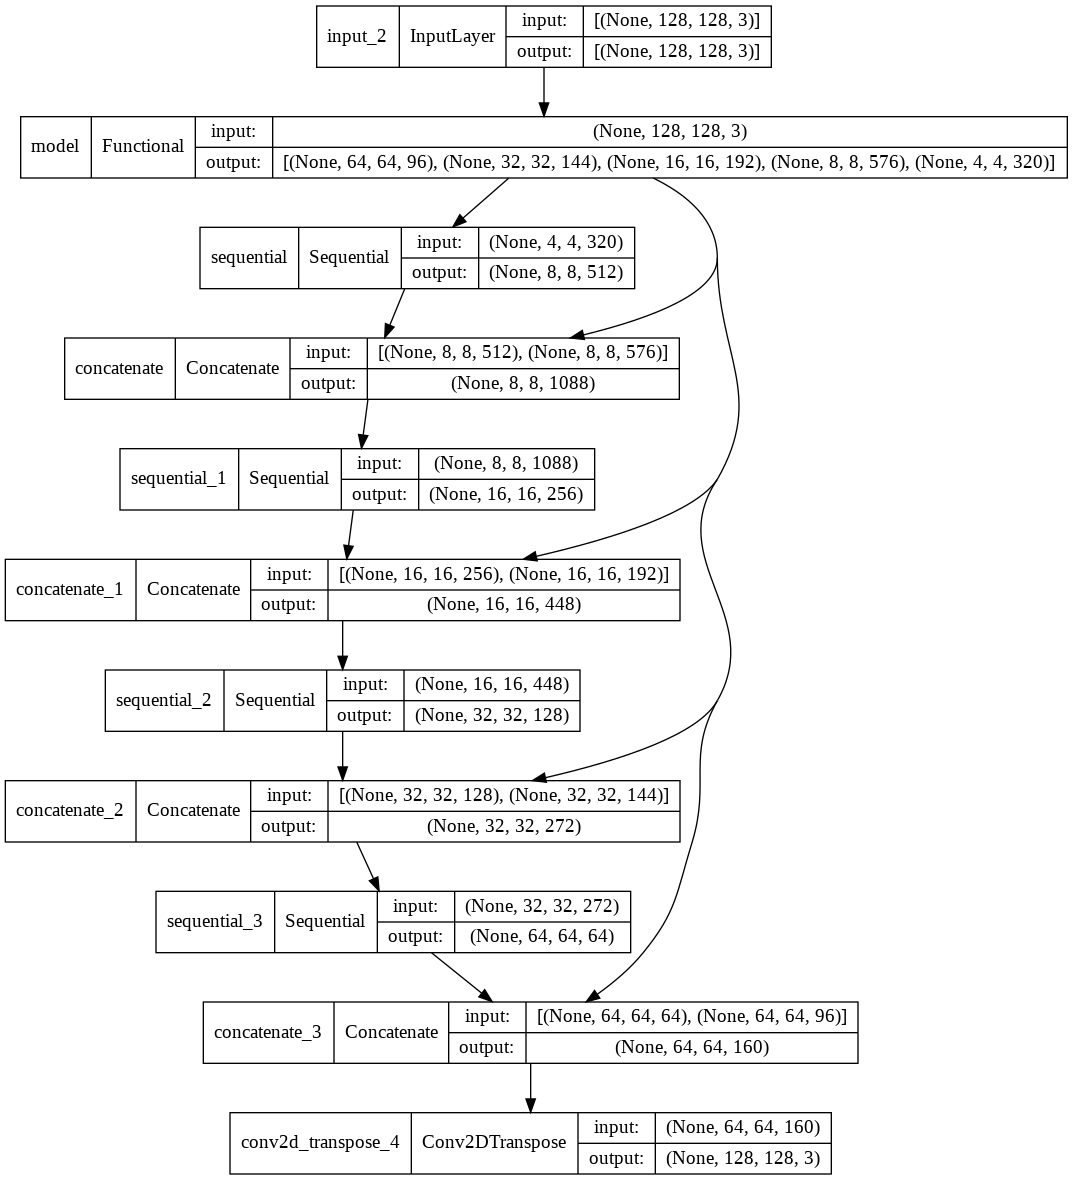

In [21]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [22]:
def create_mask(pred_mask):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

In [23]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

In [24]:
from google.colab.patches import cv2_imshow

def show_predictions(dataset=None, num=1):
  if dataset:
    print("Here")
    for image, mask in dataset.take(num):
      print(image.shape, mask.shape)
      pred_mask = model.predict(image)
      display([image[0], mask[0], create_mask(pred_mask)])
      #plt.show(image[0], mask[0], create_mask(pred_mask))
  else:
    print("There")
    print(sample_image.shape, sample_mask.shape)
    display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])
    #plt.imshow(sample_image[0]) #, sample_mask[0], create_mask(model.predict(sample_image[tf.newaxis, ...])))
    #print(sample_image[0].shape)

In [28]:
show_predictions()

There


AttributeError: ignored

In [29]:
class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    show_predictions()
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

In [27]:
TRAIN_LENGTH = 45-9
BATCH_SIZE = 45-9
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [ ]:
tf.config.run_functions_eagerly(True)

There
(128, 128, 3) (128, 128, 3)


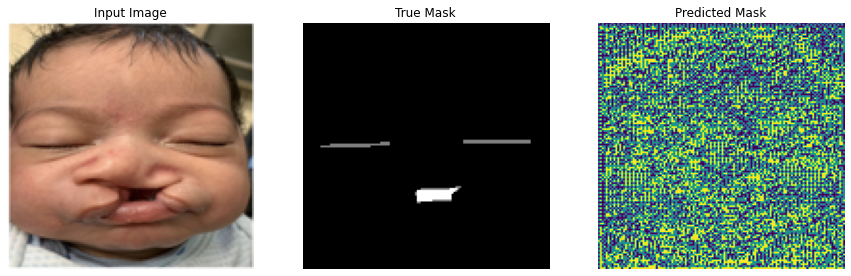


Sample Prediction after epoch 10



In [ ]:
EPOCHS = 10
VAL_SUBSPLITS = 5
VALIDATION_STEPS = 1 #mine

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset,
                          callbacks=[DisplayCallback()])

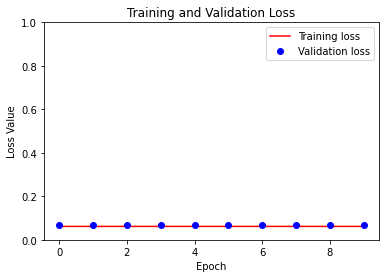

In [ ]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.figure()
plt.plot(model_history.epoch, loss, 'r', label='Training loss')
plt.plot(model_history.epoch, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()